<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing\_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


***


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [1]:
# andas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [2]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# If you were unable to complete the previous lab correctly you can uncomment and load this csv

# df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')

df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


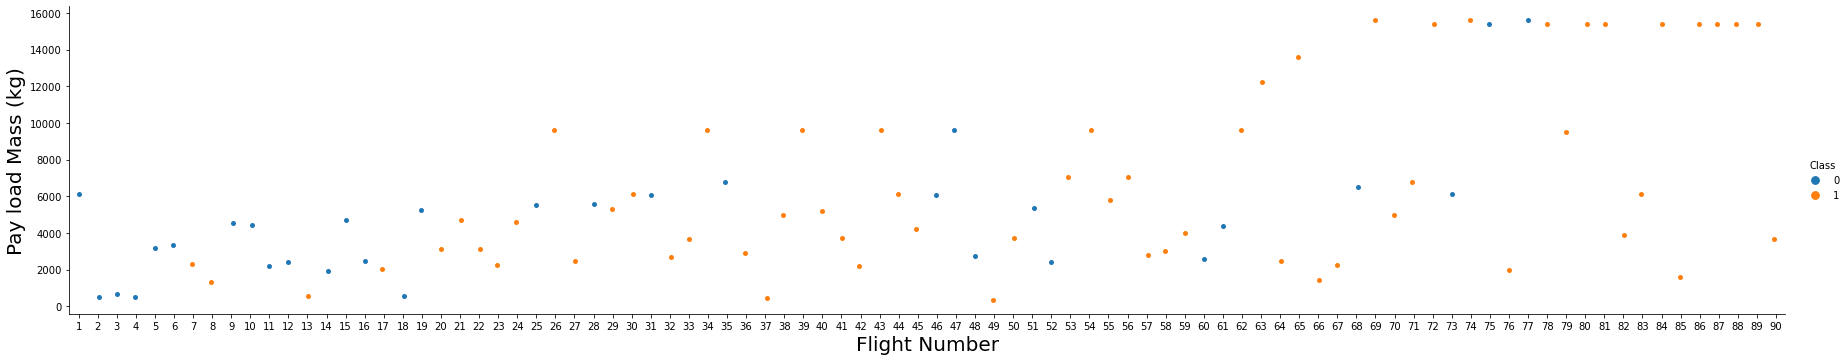

In [3]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


Next, let's drill down to each site visualize its detailed launch records.


### TASK 1: Visualize the relationship between Flight Number and Launch Site


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


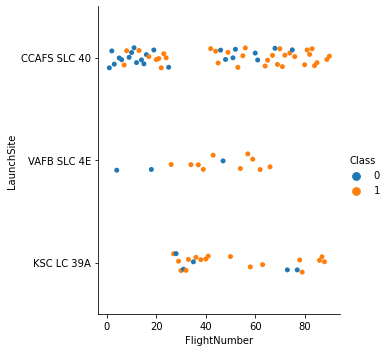

Explanations:
For CCAFS SLC launchsite, when the flight number 
increases, the success rate increases accordingly.
 
For VAFB-SLC launchsite, the trend is similar to 
CCAFS SLC launchsite but no flight number is 
greater than 70.
 
For KSC LC launchsite, no flight number is less 
than 20 and there is a weak relationship between 
flight number and success rate.


In [4]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(x="FlightNumber", y="LaunchSite", hue="Class", data=df)
plt.show()
print('Explanations:')
print(f'For CCAFS SLC launchsite, when the flight number \nincreases, the success rate increases accordingly.')
print(' ')
print(f'For VAFB-SLC launchsite, the trend is similar to \nCCAFS SLC launchsite but no flight number is \ngreater than 70.')
print(' ')
print(f'For KSC LC launchsite, no flight number is less \nthan 20 and there is a weak relationship between \nflight number and success rate.')

In [5]:
df[(df['FlightNumber']> 60) & (df['LaunchSite']=='VAFB SLC 4E')]

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
61,62,2019-01-11,Falcon 9,9600.0,PO,VAFB SLC 4E,True ASDS,2,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,5,B1049,-120.610829,34.632093,1
65,66,2019-06-12,Falcon 9,1425.0,SSO,VAFB SLC 4E,True RTLS,2,True,True,True,5e9e3032383ecb554034e7c9,5.0,5,B1051,-120.610829,34.632093,1


Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


### TASK 2: Visualize the relationship between Payload and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


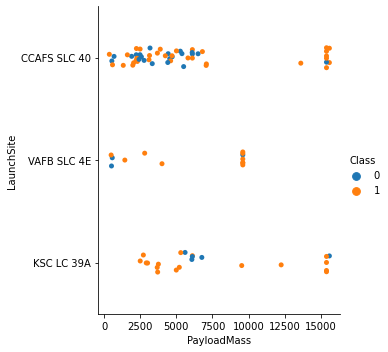

Explanations:
For CCAFS SLC launchsite, when the payload mass is 
larger than 10,000, the success rate is higher.
 
For VAFB-SLC launchsite, no rocket is launched for 
heavy payload mass (greater than 10,000).
 
For KSC LC launchsite, no rocket is launched for 
light payload mass (less than 2,500) and there is 
a weak relationship between the payload mass and 
success rate.


In [6]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.catplot(x="PayloadMass", y="LaunchSite", hue="Class", data=df)
plt.show()
print('Explanations:')
print(f'For CCAFS SLC launchsite, when the payload mass is \nlarger than 10,000, the success rate is higher.')
print(' ')
print(f'For VAFB-SLC launchsite, no rocket is launched for \nheavy payload mass (greater than 10,000).')
print(' ')
print(f'For KSC LC launchsite, no rocket is launched for \nlight payload mass (less than 2,500) and there is \na weak relationship between the payload mass and \nsuccess rate.')

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


### TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


In [7]:
df_new = df.groupby('Orbit').mean()
df_new['Orbit'] = df_new.index
df_new

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Longitude,Latitude,Class,Orbit
Orbit,,,,,,,,,,,,
ES-L1,13.000000,570.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,-80.577366,28.561857,1.000000,ES-L1
GEO,83.000000,6104.959412,2.000000,1.000000,1.000000,1.000000,5.000000,2.000000,-80.577366,28.561857,1.000000,GEO
GTO,35.037037,5011.994444,1.407407,0.629630,0.333333,0.629630,3.037037,0.962963,-80.586229,28.577258,0.518519,GTO
HEO,49.000000,350.000000,1.000000,1.000000,0.000000,1.000000,4.000000,1.000000,-80.577366,28.561857,1.000000,HEO
ISS,39.142857,3279.938095,1.238095,0.809524,0.238095,0.857143,3.142857,1.285714,-80.583697,28.572857,0.619048,ISS
LEO,20.000000,3882.839748,1.000000,0.571429,0.000000,0.714286,2.142857,0.428571,-80.584963,28.575058,0.714286,LEO
MEO,77.666667,3987.000000,1.000000,0.666667,0.000000,0.666667,5.000000,0.666667,-80.577366,28.561857,0.666667,MEO
PO,36.333333,7583.666667,1.333333,0.888889,0.333333,0.777778,3.222222,1.555556,-120.610829,34.632093,0.666667,PO
SO,73.000000,6104.959412,4.000000,0.000000,1.000000,0.000000,5.000000,3.000000,-80.603956,28.608058,0.000000,SO


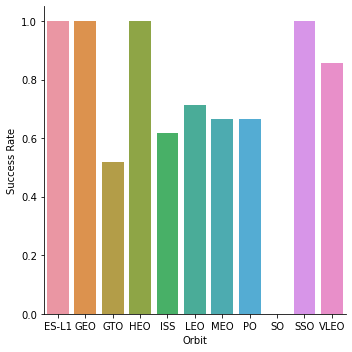

Explanations:
ES-L1, GEO, HEO and SSO have the highest success rate 
at 1 meaning landings are very likely to be successful.
 
VLEO has the second highest success rate and LEO has 
the third highest success rate.
 
MEO, PO and ISS have a moderate success rate between 
0.6 and 0.7.
 
In GTO orbit, only a half of launches are successful.
 
SO has the least success rate at 0.


In [8]:
# HINT use groupby method on Orbit column and get the mean of Class column
sns.catplot(x='Orbit', y='Class', kind="bar", data=df_new)
plt.xlabel("Orbit")
plt.ylabel("Success Rate")
plt.show()
print('Explanations:')
print(f'ES-L1, GEO, HEO and SSO have the highest success rate \nat 1 meaning landings are very likely to be successful.')
print(' ')
print(f'VLEO has the second highest success rate and LEO has \nthe third highest success rate.')
print(' ')
print(f'MEO, PO and ISS have a moderate success rate between \n0.6 and 0.7.')
print(' ')
print(f'In GTO orbit, only a half of launches are successful.')
print(' ')
print(f'SO has the least success rate at 0.')

Analyze the ploted bar chart try to find which orbits have high sucess rate.


### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


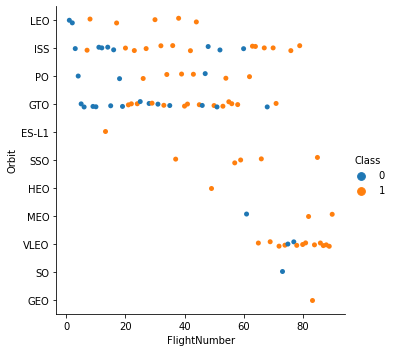

Explanations:
In LEO, ISS and PO orbits, the success rate is associated 
with the number of flights. When the flight number becomes 
bigger, the landing is more likely to succeed.
 
When in GTO orbit, there seems to be no relationship 
between the flight number and success rate.
 
When in VLEO orbit, no flight number is smaller than 60, 
there also seems to be no relationship between the flight 
number and success rate.
 
In ES-L1, SSO, HEO and GEO orbits, all launches are  
successful but there is only a small number of flights 
for prediction.
 
Similarly, in MEO and SO orbits, although the larger 
flight number has a higher success rate, the number of 
flights is too small.


In [9]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.catplot(x="FlightNumber", y="Orbit", hue="Class", data=df)
plt.show()
print('Explanations:')
print(f'In LEO, ISS and PO orbits, the success rate is associated \nwith the number of flights. When the flight number becomes \nbigger, the landing is more likely to succeed.')
print(' ')
print(f'When in GTO orbit, there seems to be no relationship \nbetween the flight number and success rate.')
print(' ')
print(f'When in VLEO orbit, no flight number is smaller than 60, \nthere also seems to be no relationship between the flight \nnumber and success rate.')
print(' ')
print(f'In ES-L1, SSO, HEO and GEO orbits, all launches are  \nsuccessful but there is only a small number of flights \nfor prediction.')
print(' ')
print(f'Similarly, in MEO and SO orbits, although the larger \nflight number has a higher success rate, the number of \nflights is too small.')


You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


### TASK  5: Visualize the relationship between Payload and Orbit type


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


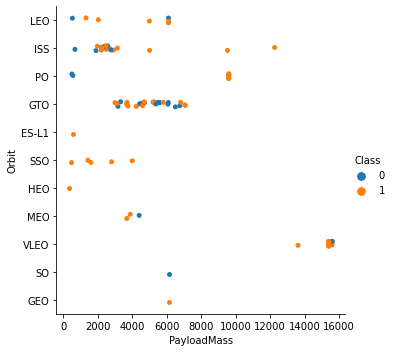

Explanations:
With heavy payloads the successful landing or 
positive landing rate are more for Polar, LEO 
and ISS.
 
By contrast, with light payloads (no more than 
4,000) the successful landing or positive landing 
rate can be higher for ES-L1, SSO, HEO and MEO.
 
There seems to be no relationship between the 
payload mass and success rate for GTO.
 
For other orbits, because there is a very small 
number of launches, it lacks robust evidence to 
conclude whether a relationship exists.


In [10]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
sns.catplot(x="PayloadMass", y="Orbit", hue="Class", data=df)
plt.show()
print('Explanations:')
print(f'With heavy payloads the successful landing or \npositive landing rate are more for Polar, LEO \nand ISS.')
print(' ')
print(f'By contrast, with light payloads (no more than \n4,000) the successful landing or positive landing \nrate can be higher for ES-L1, SSO, HEO and MEO.')
print(' ')
print(f'There seems to be no relationship between the \npayload mass and success rate for GTO.')
print(' ')
print(f'For other orbits, because there is a very small \nnumber of launches, it lacks robust evidence to \nconclude whether a relationship exists.')

In [11]:
df[(df['PayloadMass']> 3000) & (df['Orbit']=='SSO')]

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
58,59,2018-12-03,Falcon 9,4000.0,SSO,VAFB SLC 4E,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,3,B1046,-120.610829,34.632093,1


With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.


### TASK  6: Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [12]:
# A function to Extract years from the date 
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year


In [13]:
df['Year'] = Extract_year(df)
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,Year
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,2010
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,2012
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,2013
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0,2013
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0,2013


In [14]:
df_new = df.groupby('Year').mean()
df_new['Year'] = df_new.index
df_new.rename(columns={'Class':'SuccessRate'}, inplace=True)
df_new

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Longitude,Latitude,SuccessRate,Year
Year,,,,,,,,,,,,
2010,1.0,6104.959412,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-80.577366,28.561857,0.000000,2010
2012,2.0,525.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-80.577366,28.561857,0.000000,2012
2013,4.0,1449.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-93.921854,30.585269,0.000000,2013
2014,8.5,3019.333333,1.000000,0.000000,0.000000,0.333333,1.000000,0.000000,-80.577366,28.561857,0.333333,2014
2015,14.5,2346.833333,1.000000,0.833333,0.000000,0.833333,1.000000,0.000000,-80.577366,28.561857,0.333333,2015
2016,21.5,3639.125000,1.000000,1.000000,0.000000,1.000000,1.875000,0.375000,-85.581549,29.320637,0.625000,2016
2017,34.5,5365.719967,1.277778,0.833333,0.277778,0.777778,3.166667,0.777778,-91.715499,30.278835,0.833333,2017
2018,52.5,4832.767190,1.555556,0.833333,0.500000,0.833333,4.500000,1.833333,-89.476646,29.915932,0.611111,2018
2019,66.5,7551.370000,2.200000,0.900000,0.700000,0.900000,5.000000,3.800000,-88.586718,29.780524,0.900000,2019


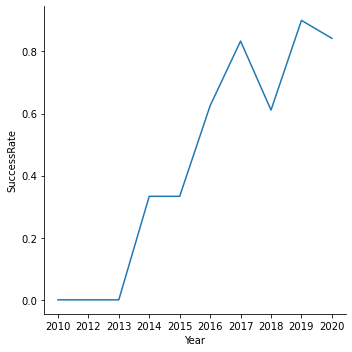

Explanations:
Generally speaking, the success rate has increased 
significantly from 2014 onward. Especially, the success 
rate increases two-fold in 2017 compared to it in 2014. 
After experiencing a decrease in 2018, the success rate 
rebounds and reaches the peak in 2019.


In [15]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
sns.relplot(x="Year", y="SuccessRate", kind="line", data=df_new)
plt.show()
print('Explanations:')
print(f'Generally speaking, the success rate has increased \nsignificantly from 2014 onward. Especially, the success \nrate increases two-fold in 2017 compared to it in 2014. \nAfter experiencing a decrease in 2018, the success rate \nrebounds and reaches the peak in 2019.')

you can observe that the success rate since 2013 kept increasing till 2020


## Features Engineering


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [16]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### TASK  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [17]:
# HINT: Use get_dummies() function on the categorical columns
features_one_hot = pd.get_dummies(features[['Orbit', 'LaunchSite', 'LandingPad', 'Serial']])
features = features.drop(['Orbit', 'LaunchSite', 'LandingPad', 'Serial'], axis=1)
features.append(features_one_hot)

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,False,False,False,1.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,525.000000,1.0,False,False,False,1.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,677.000000,1.0,False,False,False,1.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,500.000000,1.0,False,False,False,1.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,3170.000000,1.0,False,False,False,1.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### TASK  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [18]:
# HINT: use astype function
features.astype('float64')

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,1.0,1.0,1.0,5.0,2.0
86,87.0,15400.000000,3.0,1.0,1.0,1.0,5.0,2.0
87,88.0,15400.000000,6.0,1.0,1.0,1.0,5.0,5.0
88,89.0,15400.000000,3.0,1.0,1.0,1.0,5.0,2.0


We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


<code>features_one_hot.to_csv('dataset_part\_3.csv', index=False)</code>


In [19]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)

## Authors


<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


<a href="https://www.linkedin.com/in/nayefaboutayoun/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01">Nayef Abou Tayoun</a> is a Data Scientist at IBM and pursuing a Master of Management in Artificial intelligence degree at Queen's University.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By    | Change Description      |
| ----------------- | ------- | ------------- | ----------------------- |
| 2021-10-12        | 1.1     | Lakshmi Holla | Modified markdown       |
| 2020-09-20        | 1.0     | Joseph        | Modified Multiple Areas |
| 2020-11-10        | 1.1     | Nayef         | updating the input data |


Copyright © 2020 IBM Corporation. All rights reserved.
